<a href="https://colab.research.google.com/github/Mercymerine/Machine_Learning_1/blob/main/Credit_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries and Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, pair_confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [2]:
credit = pd.read_csv('/content/credit_default.csv', delimiter=',')
credit.head()

<ipython-input-2-703c7b30a6d5>:1: DtypeWarning: Columns (9,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  credit = pd.read_csv('/content/credit_default.csv', delimiter=',')


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [3]:
#Renaming columns i the dataset witheir correct names
credit_renamed = credit.rename(columns = {'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
credit_renamed.head(2)


,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


Basic EDA and Data Cleaning

In [4]:
credit_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [5]:
# Removing irrelevant columns
#irrelevant_columns = ['Time since last Personal loan taken (in months)', 'Time since first consumer durables loan taken (in months)']
#credit_renamed.drop(irrelevant_columns, axis=1, inplace=True)
credit_renamed.shape

(119528, 32)

In [6]:
#Missing value treatment
credit_renamed.dropna(axis=0, how='any', subset=['Loan Amount','Gender'], inplace =True)

In [8]:
#correlation matrix
corrmat = credit_renamed.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(credit_renamed[top_corr_features].corr(),annot=True,cmap="viridis")

ValueError: could not convert string to float: 'SC'

NameError: name 'Loan_renamed' is not defined

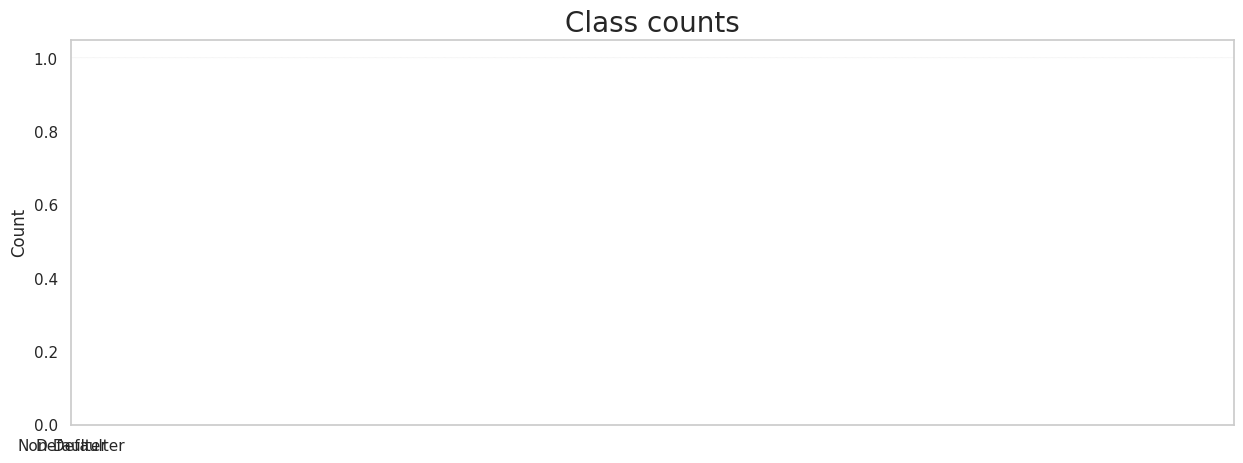

In [18]:
# Getting the number of positive and negative examples.
plt.figure(figsize=(15,5))
sns.countplot(credit_renamed['Target variable'])
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

print(credit_renamed['Target variable'].value_counts())

<ipython-input-10-ce81b6ea34cb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_renamed['Loan Amount'], ax=ax[0])


<Axes: title={'center': 'Loan Amount (Box Plot)'}, xlabel='Employment type', ylabel='Loan Amount'>

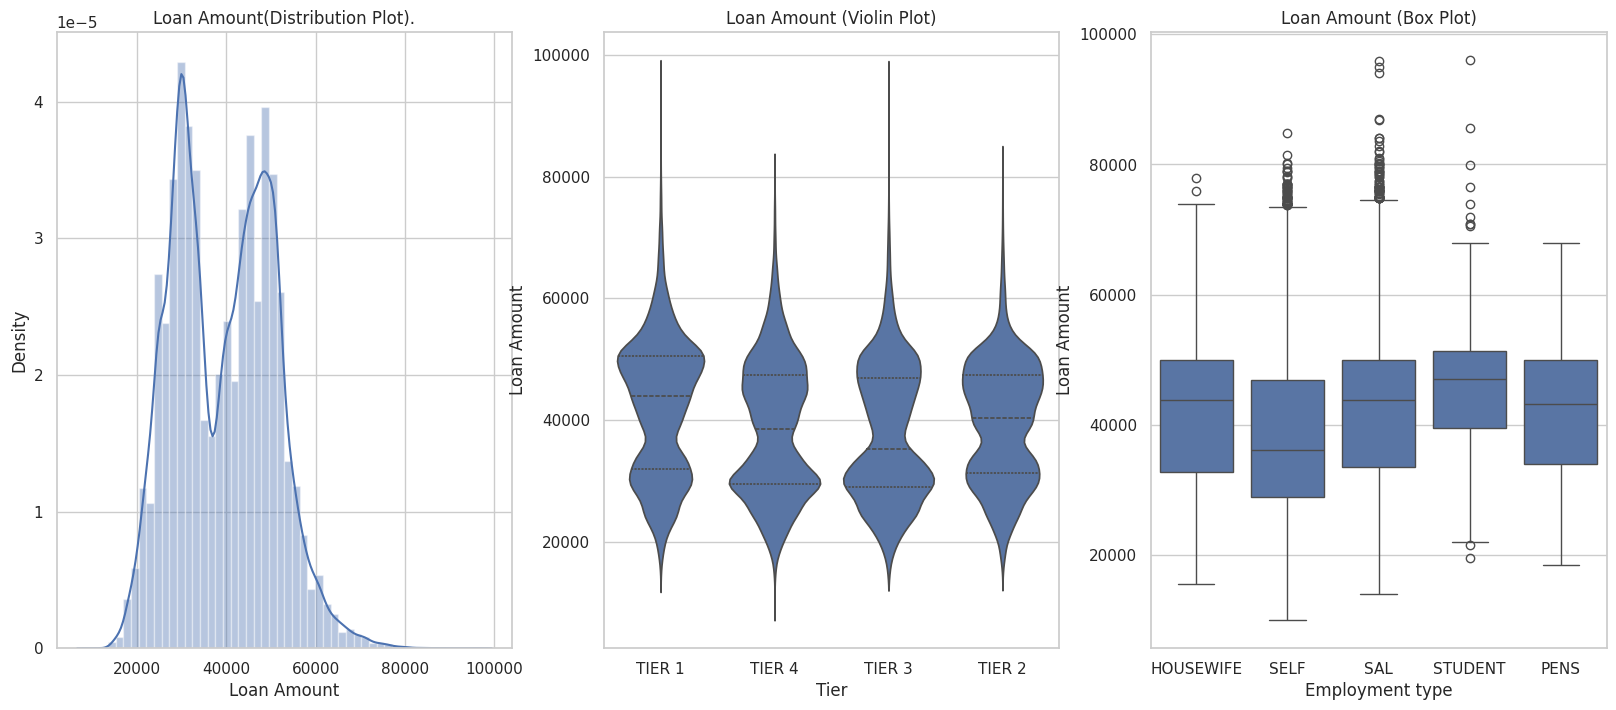

In [10]:
sns.set(style='whitegrid')

fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(20,8))
ax[0].set_title('Loan Amount(Distribution Plot).')
sns.distplot(credit_renamed['Loan Amount'], ax=ax[0])
ax[1].set_title('Loan Amount (Violin Plot)')
sns.violinplot(data = credit_renamed, x='Tier', y = 'Loan Amount', ax=ax[1], inner='quartile')
ax[2].set_title('Loan Amount (Box Plot)')
sns.boxplot(data = credit_renamed, x='Employment type', y='Loan Amount', ax=ax[2], orient='v')

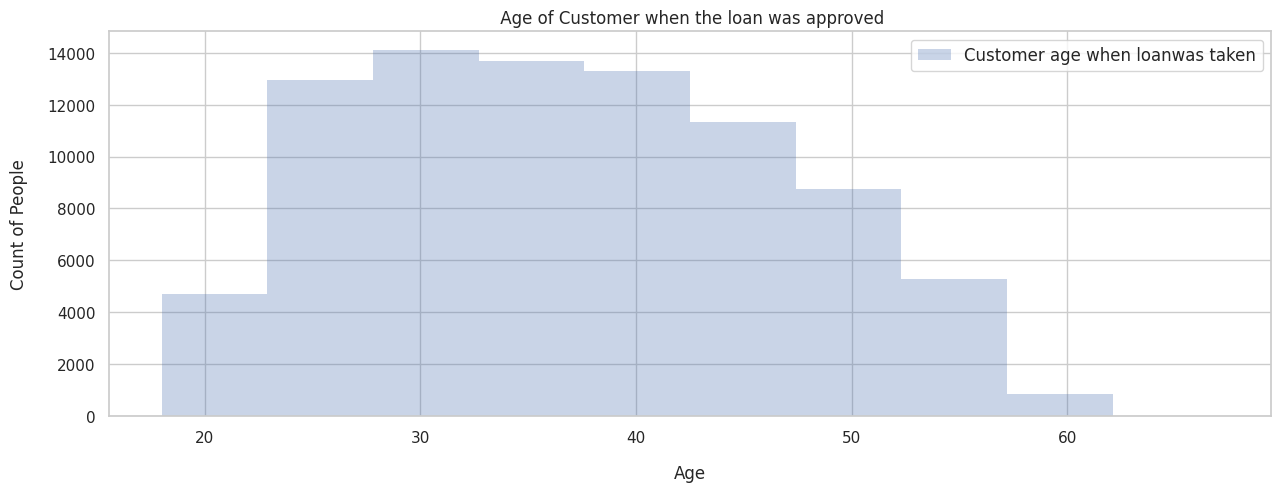

In [11]:
##Age- age at which the client took the loan
plt.figure(figsize=(15,5))

#bar plot
credit_renamed['Customer age when loanwas taken'].plot(kind='hist',color='b',alpha=0.3, edgecolor='none')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

<Axes: xlabel='Customer age when loanwas taken', ylabel='Loan Amount'>

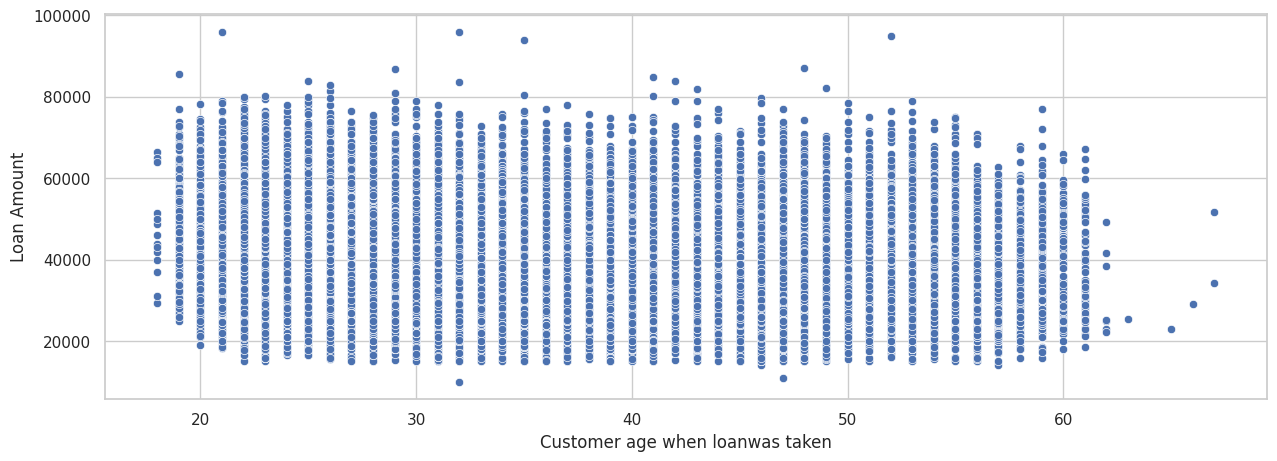

In [14]:
# Explore correlation between age and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(x=credit_renamed['Customer age when loanwas taken'],y='Loan Amount',data=credit_renamed)

In [16]:
dropped=['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

credit_renamed.drop(dropped,axis=1,inplace=True)

Data Cleaning

In [20]:
data = credit_renamed.copy()

Imputing missing values

In [21]:
CatVariables = data.select_dtypes(include=['object'])
NumVariables = data.select_dtypes(include=['float','int'])


In [22]:
#standardizing column names for easier usage
data.columns=data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
CatVariables=CatVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
NumVariables=NumVariables.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [23]:
data.head(1)

,customer_id,customer_has_bounced_in_first_emi,no_of_times_bounced_12_months,maximum_mob,no_of_times_bounced_while_repaying_the_loan,emi,loan_amount,tenure,dealer_codes_from_where_customer_has_purchased_the_two_wheeler,product_code_of_two_wheeler,...,customer_age_when_loanwas_taken,no_of_loans,no_of_secured_loans,no_of_unsecured_loans,no_of_new_loans_in_last_3_months,no_of_times_30_days_past_due_in_last_6_months,no_of_times_60_days_past_due_in_last_6_months,no_of_times_90_days_past_due_in_last_3_months,tier,target_variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,40.0,1,1,0,0,0,0,0,TIER 1,0


In [26]:
numerical_cols = data[NumVariables]
categorical_cols = data[CatVariables]

In [27]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy='median')
lat = imp_mean.fit_transform(numerical_cols)
imp_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
g_se = imp_mode.fit_transform(categorical_cols)

In [28]:
data[CatVariables] = g_se
data[NumVariables] = lat

Encoding

In [29]:
#Dealing with categorical columns
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in CatVariables:
    data[feature] = le.fit_transform(data[feature].astype(str))

Class IMbalance

In [31]:
X = data.drop(['customer_id', 'target_variable'], axis=1)
y=data['target_variable']

<Axes: >

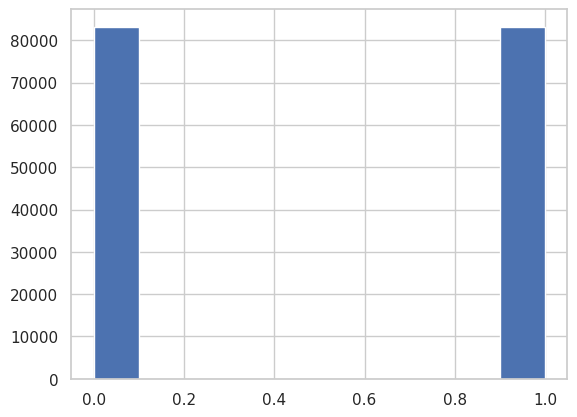

In [33]:
smote_sample = SMOTE(random_state = 124, sampling_strategy = 'auto')
x_res, y_res = smote_sample.fit_resample(X, y)
y_res.hist()

In [34]:
print(x_res.shape,y_res.shape)

(166388, 24) (166388,)
